In [1]:
!pip -q install networkx 
!pip -q install matplotlib

In [2]:
%matplotlib inline
import networkx as nx 
import random 
import matplotlib.pyplot as plt 

In [3]:
train_data = "/Users/zyang/Documents/VSCode/DeepSpin/train.data"
with open(train_data, 'r') as fin: 
    lines = fin.readlines()


G = nx.DiGraph()
for line in lines: 
    node1, node2, _ = line.split('\t')
    for node in [node1, node2]: 
        node_lst = node.split(' ')
        node_pairs = []
        for i in range(len(node_lst)-1): 
            node_pairs.append((node_lst[i], node_lst[i+1]))
        G.add_edges_from(node_pairs)

In [4]:
print("number of queries: ", 2*len(lines))
print("\nnumber of nodes: ", G.number_of_nodes())
print("\nnumber of edges: ", G.number_of_edges())
print("\nedges/nodes: ", 2*G.number_of_edges()/G.number_of_nodes())

number of queries:  108452836

number of nodes:  356919

number of edges:  21722780

edges/nodes:  121.72386451828005


In [5]:
# analyze graph 
# https://mathoverflow.net/questions/6833/difference-between-connected-vs-strongly-connected-vs-complete-graphs
# Strongly connected is usually associated with directed graphs (one way edges): there is a route between every two nodes
components_list = list(nx.strongly_connected_components(G))
degree_lst = [d for n, d in G.degree()]
print("number of connected components" ,len(components_list))

print("\ntop 20 degrees: ", sorted(degree_lst)[-20:])

number of connected components 136181

top 20 degrees:  [41669, 41941, 42210, 42268, 42862, 42897, 43109, 43859, 44356, 46034, 46200, 51329, 55879, 60314, 63239, 73987, 83785, 90230, 110503, 162050]


In [6]:
# sorted(degree_lst, key=lambda x: x[1])[-20:]
g_dict = {n:d for n, d in G.degree()}
nodes = {n: d for n, d in sorted(g_dict.items(), key=lambda item: item[1])[-20:]}
nodes


{'d': 41669,
 'design': 41941,
 'to': 42210,
 'group': 42268,
 'web': 42862,
 'home': 42897,
 'y': 43109,
 'for': 43859,
 'shop': 44356,
 'of': 46034,
 'tech': 46200,
 'my': 51329,
 'in': 55879,
 'i': 60314,
 'e': 63239,
 'and': 73987,
 'the': 83785,
 'a': 90230,
 's': 110503,
 '-': 162050}

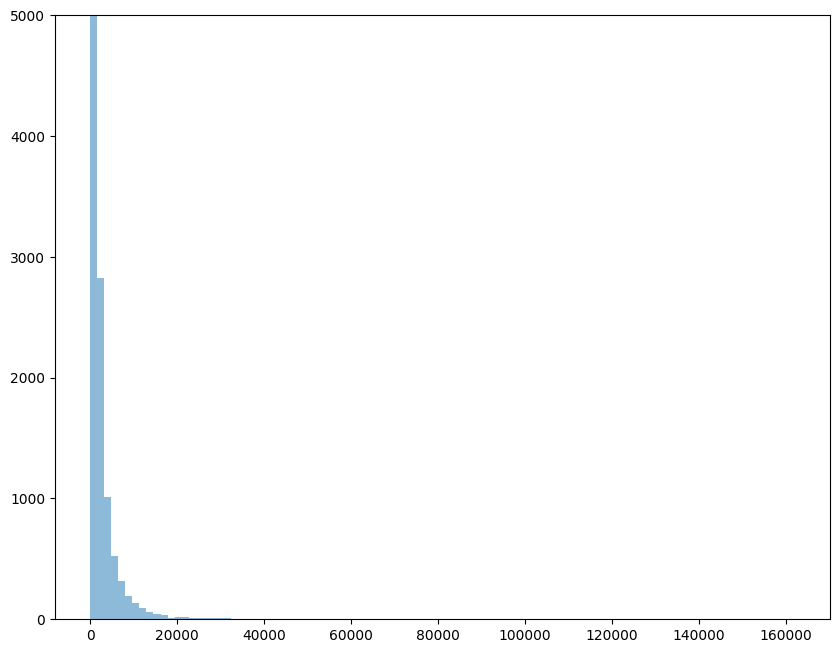

In [7]:
# a distribution of degrees 
fig, ax = plt.subplots(1, 1, figsize=(10,8), dpi=100)

ax.hist(degree_lst, alpha=0.5, bins=100)
# ax.set_xlim(0, 100)
ax.set_ylim(0, 5000)
plt.savefig("/Users/zyang/Documents/VSCode/DeepSpin/degree_dist_2.jpg")
# plt.show()

In [13]:
# get degree and neighbours

def get_random_token(): 
    random_index = random.randint(0, len(lines)-1)
    random_line = lines[random_index]
    random_index_2 = random.randint(0, 1)
    random_query = random_line.split('\t')[random_index_2]
    random_token_lst = random_query.split(' ')
    return random.choice(random_token_lst)

rand_token = get_random_token()
print(f"{rand_token} has direct neighbours: ", list(G.adj[rand_token])[:25])
print(f"\n{rand_token}'s degree: ", G.degree[rand_token])

home has direct neighbours:  ['today', 'inspection', 'inspect', 'health', 'care', 'properties', 'co', 'buyers', 'decor', 'values', 'cooking', 'baker', 'recipes', 'baking', 'cook', 'life', 'my', 'is', 'shirts', 'building', 'assist', 'grown', 'sales', 'depot', 'booker']

home's degree:  42897


In [9]:
# visualize a components 

def get_component(components, token): 
    for component in components: 
        if token in component: 
            return list(component) 
    raise Exception(f"{token} not in graph")


target_nodes = get_component(components_list, rand_token)
print("number of nodes in this component: ", len(target_nodes))
if len(target_nodes) < 10:
    nx.draw_shell(G.subgraph(target_nodes))


number of nodes in this component:  220738


In [10]:
print(target_nodes[:10])

['seglias', 'yavi', 'heitmann', 'abused', 'runnels', 'mobbing', 'circumnavigation', 'publikation', 'kuiken', 'albena']


number of small components,  136180

component nodes:  {'mudry'}


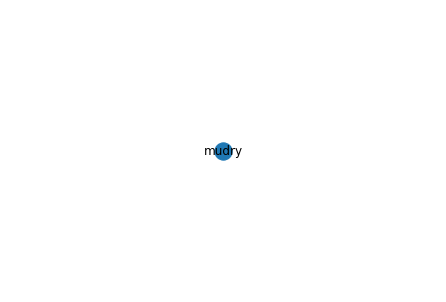

In [21]:
# visualize small components 

small_components = [component for component in components_list if len(component)<100000]
print("number of small components, ", len(small_components))

rand_index = random.randint(0, len(small_components)-1)
target_component = small_components[rand_index]

print('\ncomponent nodes: ', target_component)
nx.draw_shell(G.subgraph(target_component), with_labels=True)
plt.show()

In [12]:
# directed graph, realty -> realty agent , 
# weight, some writing are more popular than others 
# update graph near real-time, trending query, 20qps
# build edge based on pseudo edge, substring